# 🌟 Introduction

Dataset used in this notebook aims to classificate stars, galaxies, and quasars based on their spectral characteristics. Support Vector Machine (SVM) and Random Forest algorithms are used for classification purposes in this notebook. The dataset is an imbalanced dataset. For this reason, Synthetic Minority Oversampling Technique (SMOTE) is used to eliminate the imbalance between classes. Outlier values are detected with the Local Outlier Factor and these values are removed from the dataset. In the 16-dimensional data set, the correlations of the features with the class label are checked and the features with a correlation greater than 0.16 are used for classification. In addition, the seaborn library and the yellow brick library are used for data visualization.

<img src="https://media2.giphy.com/media/OYfQ5c7FPeBxe/giphy.gif">

### 💫 Content

1. [Load and Check Data](#1)
1. [Detect Outliers](#2)
1. [Feature Selection](#3)
1. [Dealing with Imbalanced Data](#4)
1. [Data Scaling](#5)
1. [Import Libraries](#6)
1. [Train / Test Split](#7)
1. [Classifiers](#8)
    * [SVM Classifier](#9)
        * [Confusion Matrix](#10)
        * [Classification Report](#11)
        * [ROC Curve](#12)
        * [Class Prediction Error](#13)
    * [Random Forest Classifier](#14)
        * [Confusion Matrix](#15)
        * [Classification Report](#16)
        * [ROC Curve](#17)
        * [Class Prediction Error](#18)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif



<a id='1'></a><br>
# Load and Check Data

In [4]:
df= pd.read_csv("star_classification.csv/star_classification.csv")

In [5]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [6]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [8]:
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

#### labeling the classes into classes into numbers

In [9]:
df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

<Axes: xlabel='class'>

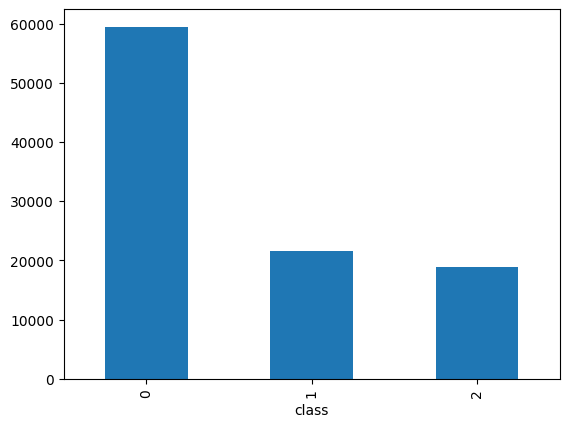

In [10]:
df["class"].value_counts().plot(kind="bar")

### Class 0 has maximum values

<a id='2'></a><br>
# Detect Outliers

In [11]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df) 

In [12]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5                                            
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [30]:
len(df)

84744

In [32]:
len(outlier_index)

256

In [14]:
df.drop(outlier_index, inplace=True)

<a id='3'></a><br>
# Feature Selection

### Using Information Gain
Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [15]:
X= df.drop('class', axis=1)
y= df['class']

In [16]:
X

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,0.586455,11069,58456,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1.237663e+18,317.246996,-0.682254,20.96526,19.81625,19.34186,19.14711,19.05790,4187,301,2,64,1.154061e+18,0.175206,1025,53239,51
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0.143366,2764,54535,74


The formula for information gain (IG) is:

IG(D, A) = H(D) - H(D|A)

Where:

IG(D, A) is the information gain of feature A in dataset D
H(D) is the entropy of the class distribution in dataset D
H(D|A) is the conditional entropy of the class distribution in dataset D given feature A
Entropy (H) is a measure of the impurity or uncertainty of a dataset. The formula for entropy is:

H(S) = - sum(p_i * log2(p_i))

Where:

H(S) is the entropy of a set S
p_i is the proportion of class i in set S
To calculate the conditional entropy H(D|A), we need to split the dataset D into subsets based on the values of feature A, and calculate the entropy of each subset. The conditional entropy is then calculated as the weighted average of the entropies of the subsets, weighted by the proportion of examples in each subset.

In simple terms, information gain measures the reduction in entropy achieved by splitting the dataset based on a particular feature, and it is used to select the most informative features for building decision trees or other machine learning models.


In [17]:
ig = mutual_info_classif(X, y)

In [18]:
ig

array([0.2915533 , 0.04181167, 0.04638436, 0.0986095 , 0.11780333,
       0.07540014, 0.11001856, 0.14606451, 0.14505962, 0.0119151 ,
       0.00221942, 0.00436265, 0.30312818, 0.79851511, 0.27398838,
       0.20028427, 0.04953286])

In [19]:
ig_dict = {}
for column_name, ig_value in zip(X.columns, ig):
    ig_dict[column_name] = ig_value


In [20]:
# Sort the dictionary by the information gain in descending order
ig_dict_sorted = dict(sorted(ig_dict.items(), key=lambda item: item[1], reverse=True))

# Select the top n features with the highest information gain
n = 5
selected_features = list(ig_dict_sorted.keys())[:n]

# Print the selected features
print('Selected Features:')
print(selected_features)


Selected Features:
['redshift', 'spec_obj_ID', 'obj_ID', 'plate', 'MJD']


C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

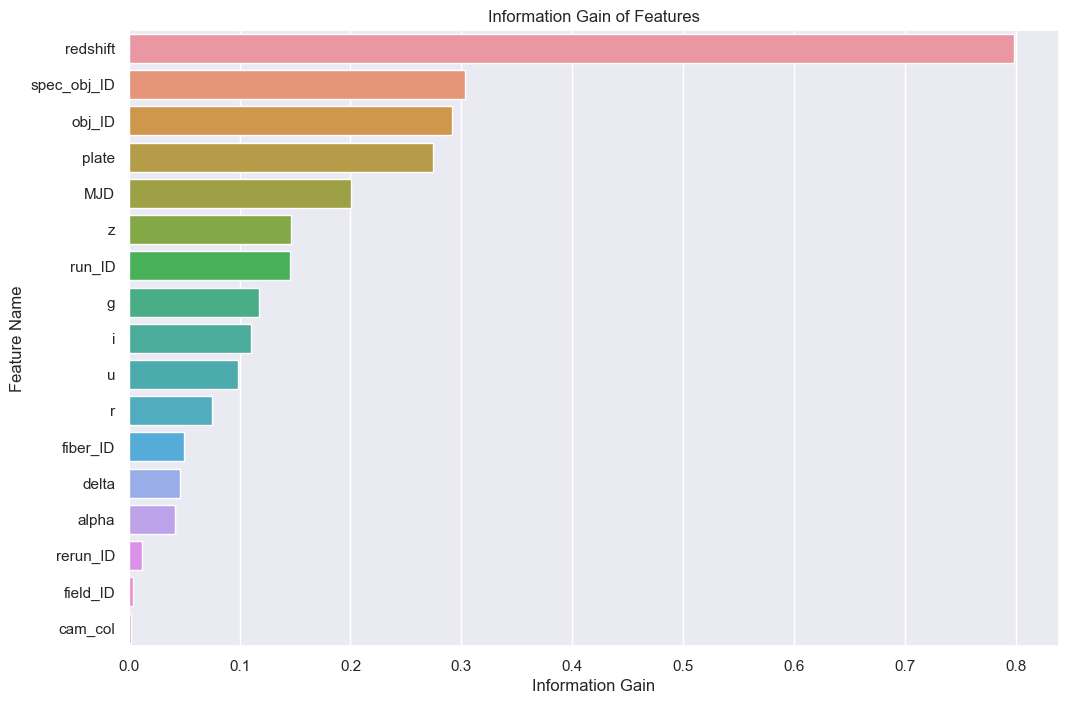

In [21]:
# Visualize the information gain of each feature
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=list(ig_dict_sorted.values()), y=list(ig_dict_sorted.keys()))
plt.title('Information Gain of Features')
plt.xlabel('Information Gain')
plt.ylabel('Feature Name')
plt.show()

### Using Correlation

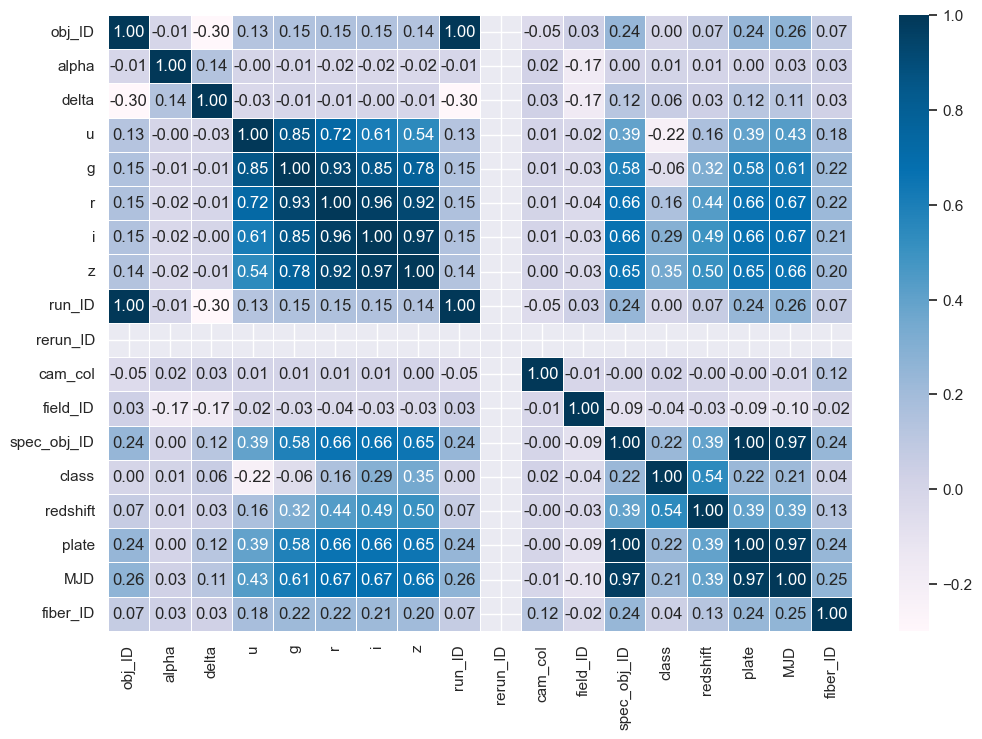

In [22]:
import seaborn as sns
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [23]:
corr = df.corr()

In [53]:
corr["class"].sort_values()

u             -0.222802
g             -0.058192
r              0.160654
MJD            0.214433
spec_obj_ID    0.224718
plate          0.224718
i              0.294075
z              0.349711
redshift       0.541667
class          1.000000
Name: class, dtype: float64

In [54]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

KeyError: "['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID'] not found in axis"

<a id='4'></a><br>
# Dealing with Imbalanced Data

In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [25]:
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

In [26]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 50695, 1: 17890, 2: 16159})
Resampled dataset shape Counter({0: 50695, 2: 50695, 1: 50695})


<Axes: xlabel='0'>

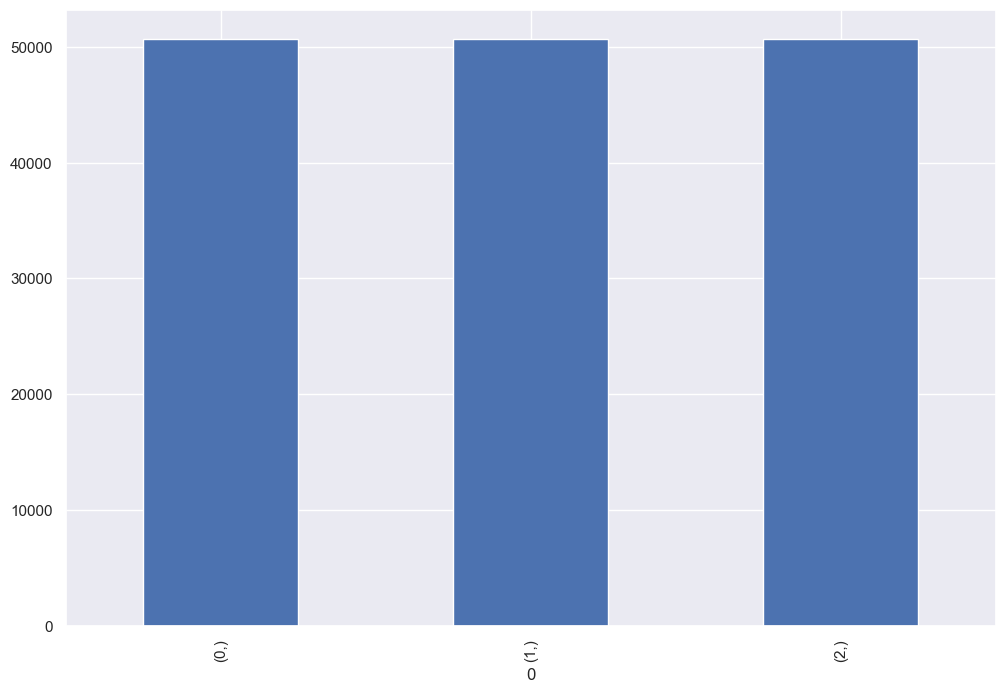

In [28]:
pd.DataFrame(y).value_counts().plot(kind="bar")

<a id='5'></a><br>
# Data Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

<a id='6'></a><br>
# Import Libraries

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

<a id='7'></a><br>
# Train / Test Split

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

<a id='8'></a><br>
# Classifiers

<a id='9'></a><br>
## SVM Classifier 

In [35]:
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.971


In [36]:
classes = ['GALAXY','STAR','QSO']

<a id='10'></a><br>
### Confusion Matrix

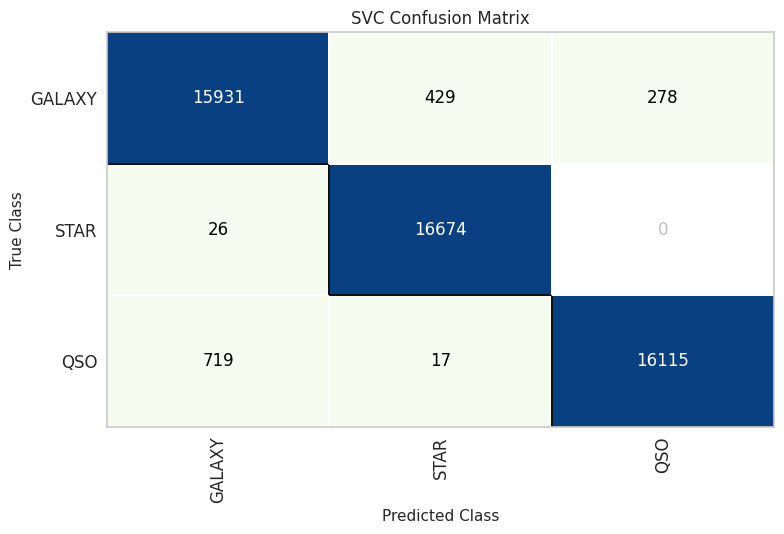

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [37]:
svm_cm = ConfusionMatrix(svm_clf, classes=classes, cmap='GnBu')

svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

The interpretation of the confusion matrix can provide insights into the performance of the Support Vector Machine (SVM) classifier:

1. **True Positives (TP)**: 
   - These are instances where the classifier correctly predicts the positive class. Each diagonal element represents the number of true positives for each class.

2. **False Positives (FP)**: 
   - These are instances where the classifier incorrectly predicts the positive class. They are the values in the column of the matrix that correspond to instances where the true class is negative, but the classifier predicted it as positive.

3. **True Negatives (TN)**: 
   - These are instances where the classifier correctly predicts the negative class. They are the values not in the row or column of the positive class.

4. **False Negatives (FN)**: 
   - These are instances where the classifier incorrectly predicts the negative class. They are the values in the row of the matrix that correspond to instances where the true class is positive, but the classifier predicted it as negative.

From these values, you can derive various performance metrics:

- **Accuracy**: Overall accuracy of the classifier, calculated as (TP + TN) / (TP + TN + FP + FN).
- **Precision**: The ability of the classifier not to label as positive a sample that is negative, calculated as TP / (TP + FP).
- **Recall (Sensitivity)**: The ability of the classifier to find all the positive samples, calculated as TP / (TP + FN).
- **F1 Score**: The harmonic mean of precision and recall, calculated as 2 * (Precision * Recall) / (Precision + Recall).

By analyzing the confusion matrix and these metrics, you can understand how well the SVM classifier is performing, where it is making errors, and which classes it is struggling with.

<a id='11'></a><br>
### Classification Report

In [38]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16638
           1       0.97      1.00      0.99     16700
           2       0.98      0.96      0.97     16851

    accuracy                           0.97     50189
   macro avg       0.97      0.97      0.97     50189
weighted avg       0.97      0.97      0.97     50189



These are the precision, recall, and F1-score values for each class, along with the overall accuracy and other metrics:

- **Precision**: 
  - Class 0: 0.96
  - Class 1: 0.97
  - Class 2: 0.98

- **Recall**: 
  - Class 0: 0.96
  - Class 1: 1.00
  - Class 2: 0.96

- **F1-score**:
  - Class 0: 0.96
  - Class 1: 0.99
  - Class 2: 0.97

- **Support**:
  - The number of instances for each class in the test set:
    - Class 0: 16638
    - Class 1: 16700
    - Class 2: 16851

- **Accuracy**: 
  - Overall accuracy of the classifier: 97%

- **Macro Average**:
  - Average precision, recall, and F1-score across all classes.

- **Weighted Average**:
  - Precision, recall, and F1-score, weighted by the number of instances for each class.

From these metrics, you can see that the classifier performs well across all classes with high precision, recall, and F1-score. Class 1 has the highest precision, recall, and F1-score, indicating that it is predicted very accurately. Class 2 also performs well, while Class 0 has slightly lower scores but is still highly accurate. 

Overall, the classifier achieves a high accuracy of 97%, which indicates strong performance in classifying instances across all classes.

<a id='12'></a><br>
### ROC Curve

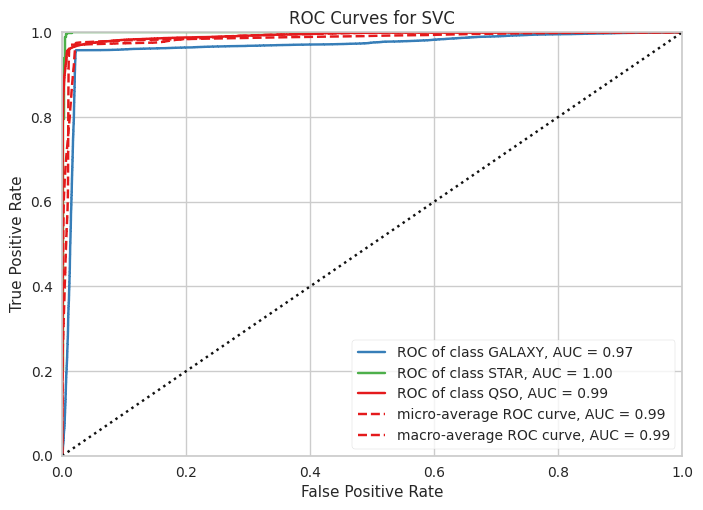

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [39]:
visualizer = ROCAUC(svm_clf, classes=classes)

set_palette('bold')

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure


1. **Initialization**:
   - `ROCAUC(svm_clf, classes=classes)`: This initializes a ROC-AUC visualizer for the SVM classifier `svm_clf`, specifying the classes it can predict.

2. **Palette Setting**:
   - `set_palette('bold')`: This sets the color palette for the visualization. The choice 'bold' might indicate a strong and visually striking palette.

3. **Fitting**:
   - `visualizer.fit(x_train, y_train)`: Fits the training data `x_train` and corresponding labels `y_train` to the visualizer.

4. **Scoring**:
   - `visualizer.score(x_test, y_test)`: Evaluates the model's performance on the test data `x_test` with corresponding labels `y_test`.

5. **Displaying**:
   - `visualizer.show()`: Finalizes and renders the ROC-AUC curve.

**Interpretation**:

- **ROC-AUC Curve**: The ROC curve is a graphical representation of the true positive rate (sensitivity) against the false positive rate (1-specificity) for different threshold values. AUC (Area Under the Curve) summarizes the ROC curve into a single value, indicating the model's performance across various threshold values.
  
- **Interpretation**:
  - AUC near 1 indicates a very good model (high true positive rate and low false positive rate).
  - AUC near 0.5 suggests a model with no discrimination ability (it performs as good as random).
  - AUC below 0.5 suggests a model that's worse than random guessing.

- **Palette Setting**:
  - The choice of palette ('bold') might indicate a visually striking and bold representation of the ROC-AUC curve.

By examining the ROC-AUC curve, you can assess the classifier's performance in terms of its ability to distinguish between different classes and determine the threshold values that optimize its performance.

<a id='13'></a><br>
### Class Prediction Error

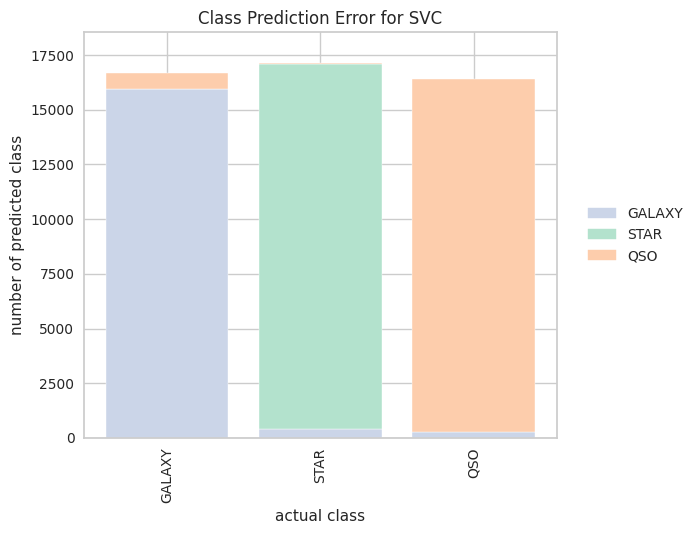

<Axes: title={'center': 'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [40]:
visualizer = ClassPredictionError(svm_clf, classes=classes)

set_palette('pastel')

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Draw visualization

This code is creating a Class Prediction Error visualization for the Support Vector Machine (SVM) classifier. Let's break it down:

1. **Initialization**:
   - `ClassPredictionError(svm_clf, classes=classes)`: This initializes a Class Prediction Error visualizer for the SVM classifier `svm_clf`, specifying the classes it can predict.

2. **Palette Setting**:
   - `set_palette('pastel')`: This sets the color palette for the visualization. The choice 'pastel' suggests a soft and visually pleasing palette.

3. **Fitting**:
   - `visualizer.fit(x_train, y_train)`: Fits the training data `x_train` and corresponding labels `y_train` to the visualizer.

4. **Scoring**:
   - `visualizer.score(x_test, y_test)`: Evaluates the model's performance on the test data `x_test` with corresponding labels `y_test`.

5. **Displaying**:
   - `visualizer.show()`: Draws the visualization.

**Interpretation**:

- **Class Prediction Error Visualization**: This visualization helps in understanding the types and frequencies of errors made by the classifier for each class. It plots the actual class against the predicted class.

- **Palette Setting**:
  - The choice of palette ('pastel') suggests a soft and visually pleasing color scheme, which might make it easier to interpret the visualization.

By examining the Class Prediction Error visualization, you can identify which classes are being misclassified more frequently and understand the types of errors made by the SVM classifier. This can provide insights into areas where the classifier may need improvement or further tuning.

<a id='14'></a><br>
## Random Forest Classifier

In [41]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.984


<a id='15'></a><br>
### Confusion Matrix

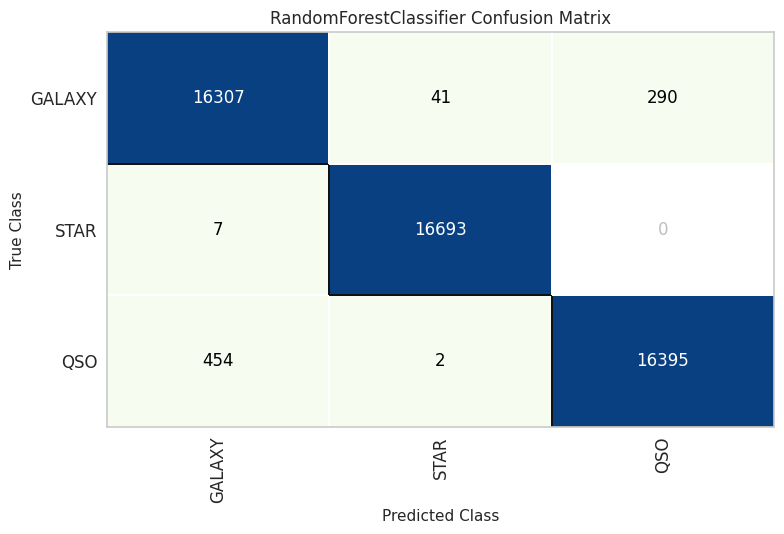

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
r_forest_cm = ConfusionMatrix(r_forest, classes=classes, cmap='GnBu')

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

<a id='16'></a><br>
### Classification Report

In [43]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16638
           1       1.00      1.00      1.00     16700
           2       0.98      0.97      0.98     16851

    accuracy                           0.98     50189
   macro avg       0.98      0.98      0.98     50189
weighted avg       0.98      0.98      0.98     50189



<a id='17'></a><br>
### ROC Curve

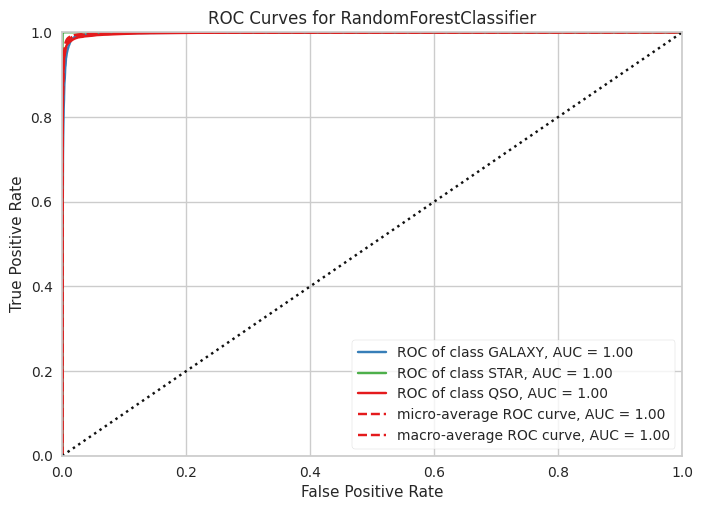

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [44]:
visualizer = ROCAUC(r_forest, classes=["GALAXY", "STAR", "QSO"])

set_palette('bold')

visualizer.fit(x_train, y_train)       
visualizer.score(x_test, y_test)        
visualizer.show()                      

<a id='18'></a><br>
### Class Prediction Error

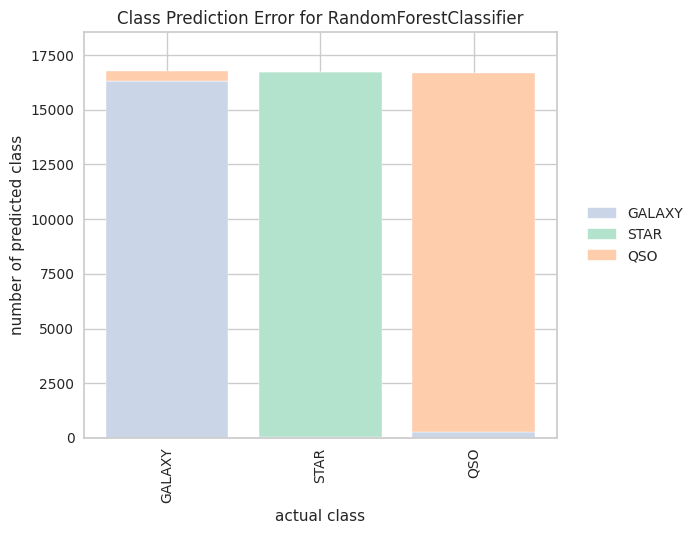

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [45]:
visualizer = ClassPredictionError(r_forest, classes=classes)

set_palette('pastel')

visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        
visualizer.show()                       